In [1]:
import re
import pandas as pd

In [2]:
f=open('WhatsApp Chat.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(type(data))

<class 'str'>


In [5]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages=re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Claudius created group "EC CSE SECTIONB(OFFICIAL)"\n',
 "You joined using this group's invite link\n",
 "Dhruthi Rao KV joined using this group's invite link\n",
 "Dishitha Mahendrakar joined using this group's invite link\n",
 "Brahmadevara Udit joined using this group's invite link\n",
 "Chakka Ranga Tagore joined using this group's invite link\n",
 "Deepti Shanbhag joined using this group's invite link\n",
 "Bhavini Madhuranath joined using this group's invite link\n",
 "Gnanesh A joined using this group's invite link\n",
 "Dev M Kumar joined using this group's invite link\n",
 "Kandula Gautham Saaketh joined using this group's invite link\n",
 "Chandana N joined using this group's invite link\n",
 "Arihan Awasthi joined using this group's invite link\n",
 'Claudius added Ananth Nagu Sir (DDCO)\n',
 "Arun Venkat joined using this group's

In [7]:
dates=re.findall(pattern,data)
dates

['8/30/2021, 16:21 - ',
 '8/30/2021, 16:16 - ',
 '8/30/2021, 16:21 - ',
 '8/30/2021, 16:21 - ',
 '8/30/2021, 16:22 - ',
 '8/30/2021, 16:22 - ',
 '8/30/2021, 16:25 - ',
 '8/30/2021, 16:25 - ',
 '8/30/2021, 16:26 - ',
 '8/30/2021, 16:28 - ',
 '8/30/2021, 16:29 - ',
 '8/30/2021, 16:35 - ',
 '8/30/2021, 16:41 - ',
 '8/30/2021, 16:46 - ',
 '8/30/2021, 17:01 - ',
 '8/30/2021, 17:04 - ',
 '8/30/2021, 17:05 - ',
 '8/30/2021, 17:14 - ',
 '8/30/2021, 17:19 - ',
 '8/30/2021, 17:23 - ',
 '8/30/2021, 17:36 - ',
 '8/30/2021, 17:43 - ',
 '8/30/2021, 17:49 - ',
 '8/30/2021, 17:50 - ',
 '8/30/2021, 17:51 - ',
 '8/30/2021, 17:54 - ',
 '8/30/2021, 17:55 - ',
 '8/30/2021, 17:58 - ',
 '8/30/2021, 18:15 - ',
 '8/30/2021, 18:18 - ',
 '8/30/2021, 18:48 - ',
 '8/30/2021, 18:55 - ',
 '8/30/2021, 19:09 - ',
 '8/30/2021, 19:38 - ',
 '8/30/2021, 19:56 - ',
 '8/30/2021, 20:26 - ',
 '8/30/2021, 21:32 - ',
 '8/31/2021, 06:18 - ',
 '9/1/2021, 20:55 - ',
 '9/1/2021, 20:55 - ',
 '9/1/2021, 22:25 - ',
 '9/1/2021, 22:25 -

In [8]:
df=pd.DataFrame({'user_message':messages, 'message_date':dates})
#convert message_data type
df['message_date']=pd.to_datetime(df['message_date'], format='%m/%d/%Y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-08-30 16:21:00
1,"Claudius created group ""EC CSE SECTIONB(OFFICI...",2021-08-30 16:16:00
2,You joined using this group's invite link\n,2021-08-30 16:21:00
3,Dhruthi Rao KV joined using this group's invit...,2021-08-30 16:21:00
4,Dishitha Mahendrakar joined using this group's...,2021-08-30 16:22:00


In [9]:
df.shape

(942, 2)

In [10]:
#Seperate users and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s', message)
    if entry[1:]:#user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group notification')
        messages.append(entry[0])
        
df['user']=users
df['message']=messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2021-08-30 16:21:00,group notification,Messages and calls are end-to-end encrypted. N...
1,2021-08-30 16:16:00,group notification,"Claudius created group ""EC CSE SECTIONB(OFFICI..."
2,2021-08-30 16:21:00,group notification,You joined using this group's invite link\n
3,2021-08-30 16:21:00,group notification,Dhruthi Rao KV joined using this group's invit...
4,2021-08-30 16:22:00,group notification,Dishitha Mahendrakar joined using this group's...


In [11]:
df['year']=df['date'].dt.year

In [12]:
df.head()

,date,user,message,year
0,2021-08-30 16:21:00,group notification,Messages and calls are end-to-end encrypted. N...,2021
1,2021-08-30 16:16:00,group notification,"Claudius created group ""EC CSE SECTIONB(OFFICI...",2021
2,2021-08-30 16:21:00,group notification,You joined using this group's invite link\n,2021
3,2021-08-30 16:21:00,group notification,Dhruthi Rao KV joined using this group's invit...,2021
4,2021-08-30 16:22:00,group notification,Dishitha Mahendrakar joined using this group's...,2021


In [13]:
df['month']=df['date'].dt.month_name()

In [14]:
df['day']=df['date'].dt.day

In [15]:
df['hour']=df['date'].dt.hour

In [16]:
df['minute']=df['date'].dt.minute

In [17]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-08-30 16:21:00,group notification,Messages and calls are end-to-end encrypted. N...,2021,August,30,16,21
1,2021-08-30 16:16:00,group notification,"Claudius created group ""EC CSE SECTIONB(OFFICI...",2021,August,30,16,16
2,2021-08-30 16:21:00,group notification,You joined using this group's invite link\n,2021,August,30,16,21
3,2021-08-30 16:21:00,group notification,Dhruthi Rao KV joined using this group's invit...,2021,August,30,16,21
4,2021-08-30 16:22:00,group notification,Dishitha Mahendrakar joined using this group's...,2021,August,30,16,22


In [18]:
df[df['user']=='Claudius'].shape

(0, 8)

In [19]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [20]:
len(words)

13117

In [21]:
df[df['message'] == '<Media omitted>\n'].shape[0]

153

In [22]:
print(df)

                   date                   user  \
0   2021-08-30 16:21:00     group notification   
1   2021-08-30 16:16:00     group notification   
2   2021-08-30 16:21:00     group notification   
3   2021-08-30 16:21:00     group notification   
4   2021-08-30 16:22:00     group notification   
..                  ...                    ...   
937 2022-04-04 20:31:00              Rohit Sir   
938 2022-04-04 20:33:00              Ravi Teja   
939 2022-04-06 12:48:00              Rohit Sir   
940 2022-04-06 15:07:00              Rohit Sir   
941 2022-04-10 19:16:00  Prof. Divyaprabha PES   

                                               message  year   month  day  \
0    Messages and calls are end-to-end encrypted. N...  2021  August   30   
1    Claudius created group "EC CSE SECTIONB(OFFICI...  2021  August   30   
2          You joined using this group's invite link\n  2021  August   30   
3    Dhruthi Rao KV joined using this group's invit...  2021  August   30   
4    Dishitha 

In [23]:
pip install urlextract

In [24]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's have URL stackoverflow.com as an example: google.com, http://facebook.com")
urls

['stackoverflow.com', 'google.com', 'http://facebook.com']

In [25]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))
links

['https://docs.google.com/spreadsheets/d/1NcHU1kzbrwCqVbIf4RbzXbmmj_5zEwUV/edit?usp=sharing&ouid=116442045864820383195&rtpof=true&sd=true',
 'https://docs.google.com/spreadsheets/d/1SQEVtR0IchrKc73OqZe1DzlvPHos1ju7/edit?usp=drivesdk&ouid=116442045864820383195&rtpof=true&sd=true',
 'campus.You',
 'Adobeanalyticschallenge.com',
 'https://www.pesuacademy.com/EquationsPractice/',
 'https://docs.google.com/spreadsheets/d/1NuSIgAhBG-UTP83laL-pQxsp1ocHM6Jd4L2raKswaKo/edit?usp=sharing',
 '1.You',
 '5.To',
 'https://teams.microsoft.com/l/meetup-join/19%3aKRaGuBXf_7OmhS0iBze_JcHd5lCk3KzWrxNWS3E07V01%40thread.tacv2/1638931218569?context=%7b%22Tid%22%3a%22e290fb02-d184-4a8c-ae49-c83b04485909%22%2c%22Oid%22%3a%22dbb672dd-395d-4103-9590-6d235349b31b%22%7d',
 'https://teams.microsoft.com/l/meetup-join/19%3acl1j_HmStOQw0kYrQuZws494HtPuC3varXWMt7i1wys1%40thread.tacv2/1638933148661?context=%7b%22Tid%22%3a%22e290fb02-d184-4a8c-ae49-c83b04485909%22%2c%22Oid%22%3a%220cd181b1-f51b-4e1d-8842-3bd398df8761%22%

In [26]:
len(links)

77

In [27]:
df

,date,user,message,year,month,day,hour,minute
0,2021-08-30 16:21:00,group notification,Messages and calls are end-to-end encrypted. N...,2021,August,30,16,21
1,2021-08-30 16:16:00,group notification,"Claudius created group ""EC CSE SECTIONB(OFFICI...",2021,August,30,16,16
2,2021-08-30 16:21:00,group notification,You joined using this group's invite link\n,2021,August,30,16,21
3,2021-08-30 16:21:00,group notification,Dhruthi Rao KV joined using this group's invit...,2021,August,30,16,21
4,2021-08-30 16:22:00,group notification,Dishitha Mahendrakar joined using this group's...,2021,August,30,16,22
...,...,...,...,...,...,...,...,...
937,2022-04-04 20:31:00,Rohit Sir,"b section , assignment 5\n",2022,April,4,20,31
938,2022-04-04 20:33:00,Ravi Teja,When the due date sir?\n,2022,April,4,20,33
939,2022-04-06 12:48:00,Rohit Sir,Avjit\nBhargav\nDev\nCan come to my cabin and ...,2022,April,6,12,48
940,2022-04-06 15:07:00,Rohit Sir,"Bhargav, after class hour come and do the sign...",2022,April,6,15,7


In [28]:
x=df['user'].value_counts().head()

In [29]:
import matplotlib.pyplot as plt

In [30]:
name = x.index
count = x.values

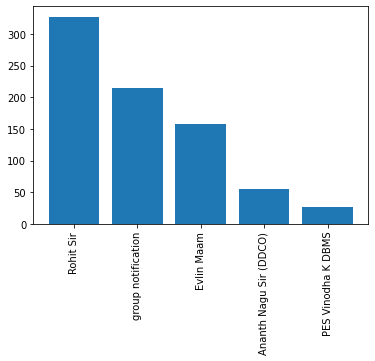

In [32]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
# Percentage of users in the chat
# Contribution of chat by each User
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,Rohit Sir,34.71
1,group notification,22.72
2,Evlin Maam,16.77
3,Ananth Nagu Sir (DDCO),5.84
4,PES Vinodha K DBMS,2.76
5,Pooja Agarwal Mam(AFLL),2.65
6,PES Sathyavani Mam(SDS),1.70
7,Ruhi Dubey OS,1.59
8,+91 94818 61701,1.59
9,Prof. Divyaprabha PES,1.49


In [34]:
temp = df[df['user'] != 'group notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [35]:
f=open('stop_hinglish.txt','r')
stop_words = f.read()


In [36]:
# Eliminating stop words present over here
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [37]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))
#Analysis on top 25 chats

,0,1
0,dear,152
1,students,142
2,"students,",97
3,class,91
4,project,49
5,shared,43
6,kindly,42
7,message,42
8,fill,41
9,special,39


In [38]:
!pip install emoji

In [39]:
import emoji

In [40]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [41]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,👆,4
1,👍,1
2,🖕,1
3,🏻,1


In [42]:
df['month_num']=df['date'].dt.month

In [43]:
timeline = df.groupby(['year','month_num']).count()['message'].reset_index()

In [44]:
timeline

,year,month_num,message
0,2021,8,38
1,2021,9,67
2,2021,10,72
3,2021,11,51
4,2021,12,65
5,2022,1,101
6,2022,2,113
7,2022,3,83
8,2022,4,46
9,2022,5,43
